<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales Convolucionales y Recurrentes </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Regularización en Redes Convolucionales.
* Diseño e implementación de redes recurrentes (RNN) usando keras.
* Diseño y entrenamiento de autoencoders (AEs)
* Transfer Learning, pre-entrenamiento (*fine tunning*).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 1 y 4 de Junio.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Entrenamiento de RNNs en una Serie de Tiempo    
[2.](#segundo) Redes recurrentes sobre texto  
[3.](#tercero) Autoencoders (AEs) en MNIST  
[4.](#cuarto) Transfer Learning

*Nota: Para esta actividad si es que no se cuenta con GPU se recomienda utilizar el entorno virtual de __[Colaboratory - Google](https://colab.research.google.com/)__*


<a id="segundo"></a>
## 2.  Redes recurrentes sobre texto
Hoy en dı́a, una aplicación relevante de las redes neuronales recurrentes es el modelamiento de texto y lenguaje natural. En esta sección abordaremos el problema de procesar sentencias de texto proporcionadas por GMB (*Groningen Meaning Bank*) para reconocimiento de entidades y tagger. Trabajaremos con el dataset proprocionado a través de la interfaz de Kaggle en el siguiente __[link](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)__, con mas de un millón de palabras trabajaremos este dataset para realizar predicciones sobre distintas tareas, del tipo *many to many* y *many to one*.

<img src="https://i.stack.imgur.com/b4sus.jpg" width="70%" />


Descargue los datos de la página de Kaggle y cárgelos a través de *pandas*.
```python
import numpy as np
import pandas as pd
df_ner = pd.read_csv("./entity-annotated-corpus/ner.csv", error_bad_lines=False)
df_ner.dropna(inplace=True)
```


In [65]:
import numpy as np
import pandas as pd
df_ner = pd.read_csv("ner.csv", encoding ="cp1252", error_bad_lines=False)
df_ner.dropna(inplace=True)

b'Skipping line 281837: expected 25 fields, saw 34\n'


In [66]:
df_ner.columns

Index(['Unnamed: 0', 'lemma', 'next-lemma', 'next-next-lemma', 'next-next-pos',
       'next-next-shape', 'next-next-word', 'next-pos', 'next-shape',
       'next-word', 'pos', 'prev-iob', 'prev-lemma', 'prev-pos',
       'prev-prev-iob', 'prev-prev-lemma', 'prev-prev-pos', 'prev-prev-shape',
       'prev-prev-word', 'prev-shape', 'prev-word', 'sentence_idx', 'shape',
       'word', 'tag'],
      dtype='object')

1. lemma: Lemma of a token in sentence 
2. next-lemma: Lemma of next token in sentence
3. next-next-lemma: Lemma of token at +2nd position to the current token in sentence
4. next-next-pos: POS tag of token at +2nd position to the current token in sentence
5. next-next-shape: Shape of token at +2nd position to the current token in sentence
6. next-next-word: Token at +2nd position to the current token in sentence
7. next-pos: POS tag of the next(+1 position) token
8. next-shape: Shape of the next(+1 position) token
9. next-word: Next(+1 position) token
10. pos: POS tag of current token
11. prev-iob: IOB annotation of previous token
12. prev-lemma: Lemma of previous token
13. prev-pos: POS tag for previous token
14. prev-prev-iob: IOB annotation of token at -2nd position to the current token in sentence
15. prev-prev-lemma: Lemma of token at -2nd position to the current token in sentence
16. prev-prev-pos: POS tag of token at -2nd position to the current token in sentence
17. prev-prev-shape: Shape of token at -2nd position to the current token in sentence
18. prev-prev-word: Token at -2nd position to the current token in sentence
19. prev-shape: Shape of previous(-1 position to current token) token
20. prev-word: Previous word(-1 position to current token)
21. sentence_idx: Sentence Index(Tokens having same index belongs to same sentence)
22. shape: Shape of the token in sentence
23. word: Often termed as Token
24. tag: IOB annotation of current token

In [67]:
df_ner.shape

(1050794, 25)

In [68]:
df_ner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050794 entries, 0 to 1050794
Data columns (total 25 columns):
Unnamed: 0         1050794 non-null int64
lemma              1050794 non-null object
next-lemma         1050794 non-null object
next-next-lemma    1050794 non-null object
next-next-pos      1050794 non-null object
next-next-shape    1050794 non-null object
next-next-word     1050794 non-null object
next-pos           1050794 non-null object
next-shape         1050794 non-null object
next-word          1050794 non-null object
pos                1050794 non-null object
prev-iob           1050794 non-null object
prev-lemma         1050794 non-null object
prev-pos           1050794 non-null object
prev-prev-iob      1050794 non-null object
prev-prev-lemma    1050794 non-null object
prev-prev-pos      1050794 non-null object
prev-prev-shape    1050794 non-null object
prev-prev-word     1050794 non-null object
prev-shape         1050794 non-null object
prev-word          1050794 n

In [69]:
df_ner.head()

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O


El dataset es básicamente una gran colección de palabras, 1050794 para ser exactos, en sentencias diferentes, junto a las palabras que le anteceden y que le prosiguen, además varios descriptores, siendo los más importantes sus etiquetados gramaticales (Pos Taggers) y sus lematizaciones (Lemmas).

> a) En esta primera instancia trabajaremos con la tarea de realizar un POS *tag* (*Part of Speech*) sobre cada una de las palabras en las sentencias que se nos presenta en los datos, también puede intentar el NER (*Named Entity Recogntion*) sobre la columna *tag*, esta tarea es del tipo *many to many*, es decir, la entrada es una secuencia y la salida es una secuencia sin *shift*, por lo que necesitaremos una estructura de red adecuada a esto. En primer lugar extraiga las columnas que utilizaremos del dataset ¿Por qué es conveniente utilizar *lemma* en vez de la palabra misma *word*?
```python
dataset = df_ner.loc[:,["lemma","pos","tag","prev-iob"]]
```


In [70]:
dataset = df_ner.loc[:,["lemma","pos","tag","prev-iob"]]

In [71]:
dataset.shape

(1050794, 4)

In [72]:
dataset.head()

,lemma,pos,tag,prev-iob
0,thousand,NNS,O,__START1__
1,of,IN,O,O
2,demonstr,NNS,O,O
3,have,VBP,O,O
4,march,VBN,O,O


Cada vez que se trabaja con texto para realizar análisis de estos o para aprender de ellos, como en este caso, es de suma importancia eliminar información redundante, inútil o desagregada; es decir, se deben limpiar los datos de manera que sean de utilidad. Uno de los procesos para la limpieza de texto es la lematización, o sea, llevar una palabra a su raíz gramatical de manera que las ocurrencias de estas en distintas conjugaciones puedan utilizarse indistintamente. Esta es la razón principal de que se ocupe la columna <i>lemma</i> en vez de la columna <i>word</i>.

Luego de esto cree una estructura que contendrá todas las sentencias u oraciones y otra estructura que contendrá los *pos tagger*, esto es un arreglo de arreglos de *lemmas* y un arreglo de arreglos de *tags* respectivamente. ¿Cuales son las dimensiones de ambas estructuras? ¿Cada dato de ejemplo tiene las mismas dimensiones que el resto?
```python
dataX,dataY = [],[]
#uniques
lemmas,labels = set(), set()
for fila in dataset.values:
    if fila[-1]=="__START1__": 
        dataX.append(np.asarray(sentence))
        dataY.append(np.asarray(labels_sentence))
        sentence= []
        label_sentence = []
    lemmas.add(fila[0])
    labels.add(fila[1])
    sentence.append(fila[0])#add lemma
    labels_sentence.append(fila[1]) #POS o TAG
#data to  array
dataX = np.asarray(dataX[1:])
dataY = np.asarray(dataY[1:])
```    



In [73]:
dataset.values[0]

array(['thousand', 'NNS', 'O', '__START1__'], dtype=object)

In [74]:
dataX = []
dataY = []
lemmas = set()
labels = set()
sentence= [] 
l_sentence = [] 

for datos in dataset.values:
    if datos[-1]=="__START1__": 
        dataX.append(np.asarray(sentence)) 
        dataY.append(np.asarray(l_sentence))
        sentence= []  
        l_sentence = []
    lemmas.add(datos[0])
    labels.add(datos[1])
    sentence.append(datos[0])
    l_sentence.append(datos[1])
    
dataX = np.asarray(dataX[1:]) 
dataY = np.asarray(dataY[1:])

In [75]:
dataX.shape

(48081,)

> b) Estudie la distribución del largo de los textos a procesar. Estudie también la frecuencia con la que aparecen
las palabras en todo el dataset. ¿Se observa una ley Zipf? ¿Cambia el resultado cuando se separan los textos de acuerdo a su clase/categorı́a? Comente.



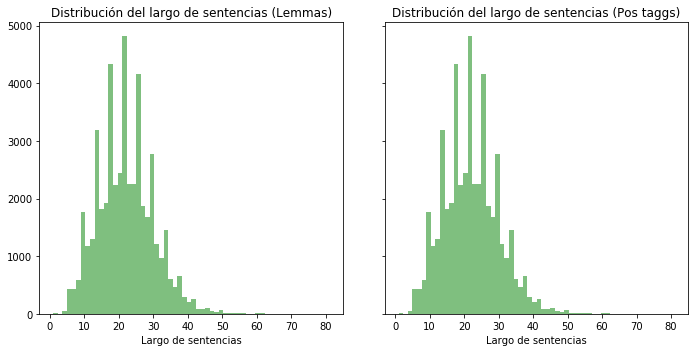

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def largo_sentencias(dicc):
    largo = []
    for sentencia in dicc:
        largo.append(len(sentencia))
    return largo

largo_lemmas = largo_sentencias(dataX)
largo_tags = largo_sentencias(dataY)

n = 60

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()

a.hist(largo_lemmas, n, facecolor='green', alpha=0.5)
a.set_xlabel("Largo de sentencias")
a.set_title('Distribución del largo de sentencias (Lemmas)', fontsize=12)


b.hist(largo_tags, n, facecolor='green', alpha=0.5)
b.set_title('Distribución del largo de sentencias (Pos taggs)', fontsize=12)
b.set_xlabel("Largo de sentencias")
fig.tight_layout()

plt.show()

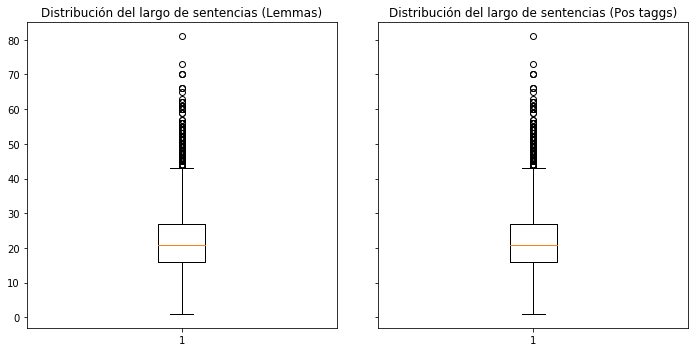

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()

a.boxplot(largo_lemmas)
a.set_title('Distribución del largo de sentencias (Lemmas)', fontsize=12)


b.boxplot(largo_tags)
b.set_title('Distribución del largo de sentencias (Pos taggs)', fontsize=12)
fig.tight_layout()

plt.show()

Primero se debe entender que cada lemma en las sentencias tiene su propia etiqueta, por lo que ambas distribuciones deben si o si ser iguales.
Se puede denotar como los histogramas siguen una tendencia normal de distribución, centrada aproximadamente en largo 20, es notable que aunque la mayoría del corpus se encuentre dentro de largos aceptable para la distribución, también existen bastantes outliers (por sobre las 45 palabras).

La ley de Zipf, es una ley empírica la cual dicta que la frecuencia de aparición de distintas palabras sigue una distribución que puede aproximarse por $P_{n} \sim \frac{1}{n^{a}}$, donde Pn representa la frecuencia de la n-ésima palabra más frecuente y el exponente a es un número real positivo, en general ligeramente superior a 1. Esto significa que el segundo elemento se repetirá aproximadamente con una frecuencia de 1/2 de la del primero, el tercer elemento con una frecuencia de 1/3 y así sucesivamente. La ley de Zipf se cumple para la mayoría de los idiomas y también es aplicable en otros ambitos, como por ejemplo la densidad poblacional entre ciudades de un mismo país.


In [78]:
import operator
def frecuencia(dicc):
    diccionario = dict()
    for sentencia in dicc:
        for palabra in sentencia:
            if palabra not in diccionario:
                diccionario[palabra] = 0
            else:
                diccionario[palabra] += 1
    return diccionario

frecuencia_lemmas = frecuencia(dataX)
frecuencia_lemmas = sorted(frecuencia_lemmas.items(), key=operator.itemgetter(1))
frecuencia_lemmas.reverse()
lemmas = []
frecuencias = []
for par in frecuencia_lemmas:
    palabra, numero = par  
    lemmas.append(palabra)
    frecuencias.append(numero)

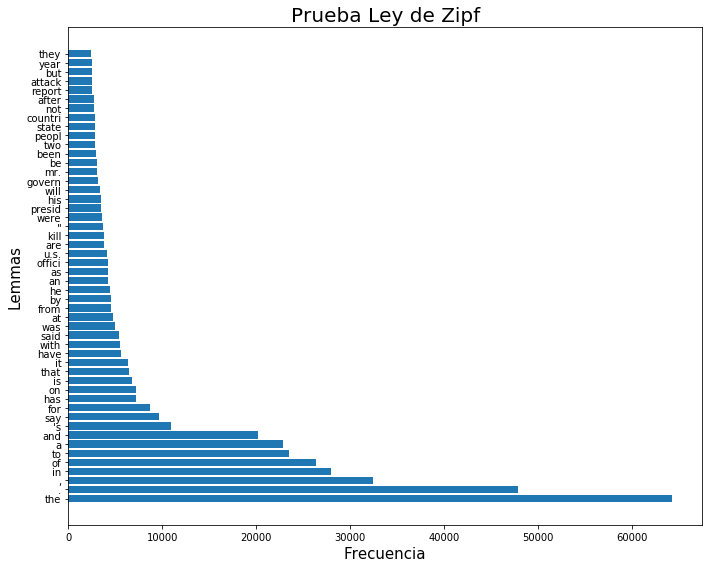

In [79]:
import numpy as np
import matplotlib.pyplot as plt
lemmas_corto = lemmas[:50]
frecuenciass = frecuencias[:50]
n_lemma = np.arange(len(lemmas_corto))

plt.figure(figsize=(10,8))
plt.title("Prueba Ley de Zipf", fontsize =20)
plt.barh(n_lemma, frecuenciass,align='center')
plt.yticks(n_lemma, lemmas_corto) 
plt.ylabel('Lemmas', fontsize=15)
plt.xlabel('Frecuencia', fontsize=15)
plt.tight_layout()
plt.show()

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


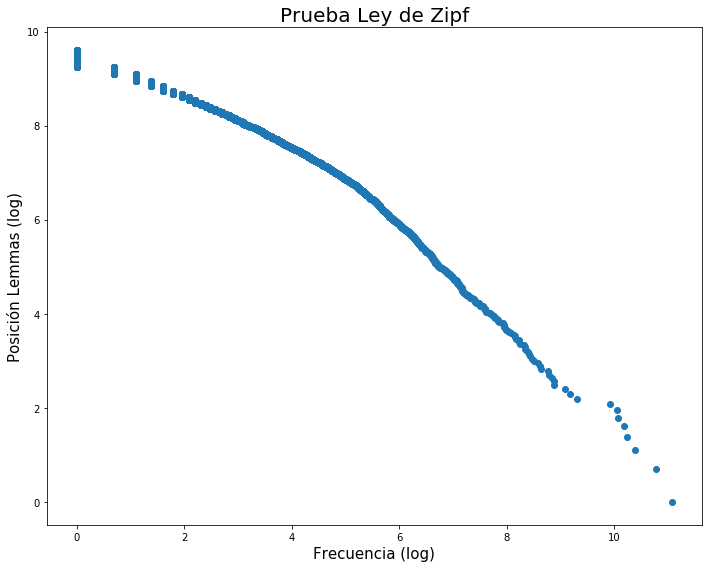

In [80]:
import numpy as np
import matplotlib.pyplot as plt
frecuencias_log = list(map(np.log,frecuencias))
n_lemma = np.arange(1,len(lemmas)+1)
n_lemma = list(map(np.log,n_lemma))

plt.figure(figsize=(10,8))
plt.title("Prueba Ley de Zipf", fontsize =20)
plt.scatter(frecuencias_log,n_lemma)
plt.ylabel('Posición Lemmas (log)', fontsize=15)
plt.xlabel('Frecuencia (log)', fontsize=15)
plt.tight_layout()
plt.show()

Se puede notar como la Ley de Zifp está presente en el conjunto de lemmas, si bien no se encuentra perfectamente representada, sobre todo en las colas del gráfico, posiblemente se pueda encontrar una constante que sintonice de buena forma la aproximación.

In [81]:
frecuencia_tag = frecuencia(dataY)
frecuencia_tag = sorted(frecuencia_tag.items(), key=operator.itemgetter(1))
frecuencia_tag.reverse()
tags = []
frecuencias_tags = []
for par in frecuencia_tag:
    pos, numero = par  
    tags.append(pos)
    frecuencias_tags.append(numero)

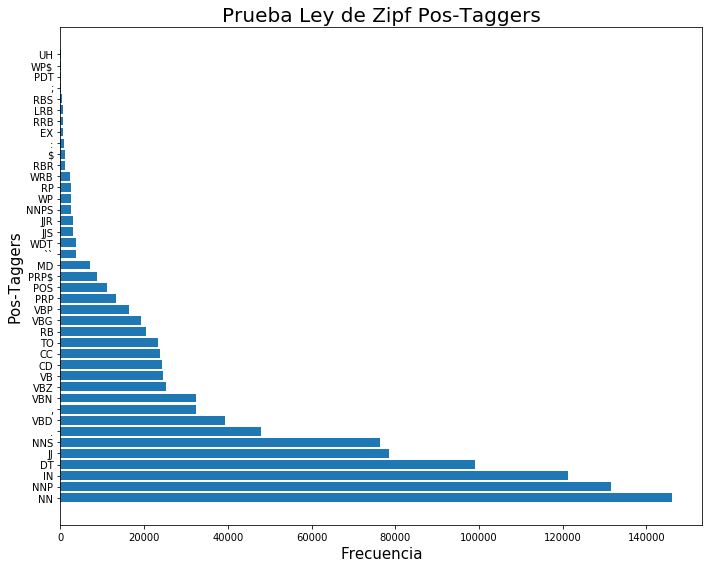

In [82]:
import numpy as np
import matplotlib.pyplot as plt
tags_corto = tags[:50]
frecuencias_tags = frecuencias_tags[:50]
n_tags = np.arange(len(tags_corto))

plt.figure(figsize=(10,8))
plt.title("Prueba Ley de Zipf Pos-Taggers", fontsize =20)
plt.barh(n_tags, frecuencias_tags,align='center')
plt.yticks(n_tags, tags_corto) 
plt.ylabel('Pos-Taggers', fontsize=15)
plt.xlabel('Frecuencia', fontsize=15)
plt.tight_layout()
plt.show()

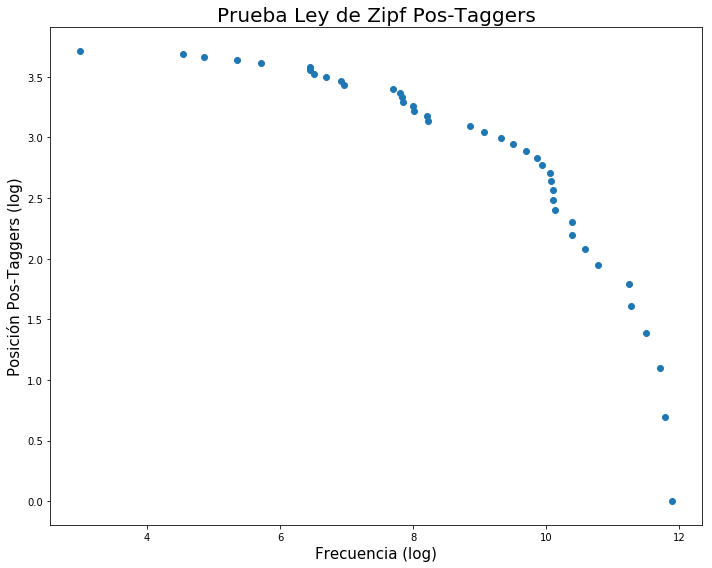

In [83]:
import numpy as np
import matplotlib.pyplot as plt

frecuencia_tag = frecuencia(dataY)
frecuencia_tag = sorted(frecuencia_tag.items(), key=operator.itemgetter(1))
frecuencia_tag.reverse()
tags = []
frecuencias_tags = []
for par in frecuencia_tag:
    pos, numero = par  
    tags.append(pos)
    frecuencias_tags.append(numero)

frecuencias_tags = list(map(np.log, frecuencias_tags))
n_tags = np.arange(1,len(tags)+1)
n_tags = list(map(np.log, n_tags))

plt.figure(figsize=(10,8))
plt.title("Prueba Ley de Zipf Pos-Taggers", fontsize =20)
plt.scatter(frecuencias_tags,n_tags)
plt.ylabel('Posición Pos-Taggers (log)', fontsize=15)
plt.xlabel('Frecuencia (log)', fontsize=15)
plt.tight_layout()
plt.show()

Para el caso de los Pos-taggers difícilmente se puede hayar la correlación que lleva a la Ley de Zifp, puesto que en el gráfico anterior no se puede encontrar una tendencía de comportamiento lineal entre el el logaritmo del ranking y el logaritmo de la frecuencia de cada pos-tagger.


> c) Es necesario transformar los textos para que puedan ser entregados apropiadamente a la red, por lo será necesario crear una función que codifique cada posible *lemma* a un número y cada posible *tag* a otro número, utilice esta función sobre las sentencias y *tags* ya generados. Mida cual es el largo máximo de entre todas las sentencias, la cantidad de *lemmas* y etiquetas. Además de esto, debido al largo distinto de las sentencias se deberá realizar *padding* para estandarizar el largo, considere algun carácter especial para codificar el espacio en blanco que luego se le deberá rellenar, por ejemplo si el largo máximo es de 4 y se tiene la sentencia "the rocket" codificada como [32,4] será necesario agregar un *lemma* que codificado significará el fin de la sentencia "the rocket *ENDPAD ENDPAD*" y codificado quedará como [32,4,*0, 0*].
```python
...#add fullfill lemma and tag to the dictionary
lemma2idx = {w: i for i, w in enumerate(lemmas)} #Converting text to numbers
lab2idx = {t: i for i, t in enumerate(labels)}
dataX = [[lemma2idx[lemma] for lemma in sentence ] for sentence in dataX]
dataY = [[lab2idx[pos] for pos in pos_tags ] for pos_tags in dataY]
n_lemmas = len(lemmas)
n_labels = len(labels)
```



El carácter de padding tanto para Lemmas como para Pos-taggers será $. El padding se realizará al final de la oración en caso de ser necesario.

In [84]:
lemmas.append('$')
tags.append('$')
lemma2idx = {w: i for i, w in enumerate(lemmas)} #Converting text to numbers
lab2idx = {t: i for i, t in enumerate(tags)}
dataX = [[lemma2idx[lemma] for lemma in sentence ] for sentence in dataX]
dataY = [[lab2idx[pos] for pos in pos_tags ] for pos_tags in dataY]
n_lemmas = len(lemmas)
n_labels = len(tags)
print("Cantidad de lemmas "+str(n_lemmas))
print("Cantidad de pos-tags "+str(n_labels))

Cantidad de lemmas 20244
Cantidad de pos-tags 42


La cantidad de Lemmas y Pos-taggers con significado es uno menos que los números que se pueden apreciar arriba, ya que se está contando el carácter $ como uno válido.

Cantidad de lemmas con significado: 20243

Cantidad de pos-taggers con significado: 41

> d) Realice el *padding* anteriormente mencionado, decida sobre qué le parece mas conveniente al rellenar con el valor especial ¿Al principio o al final de la sentencia? Comente
```python
from keras.preprocessing import sequence
X = sequence.pad_sequences(dataX,maxlen=max_input_lenght,padding='post' or 'pre',value=lemma2idx["yourspecialcharacter"]) 
y = sequence.pad_sequences(dataY,maxlen=max_input_lenght,padding='post' or 'pre',value=lab2idx["endtagger"])
```



En este caso se utilizará pre-padding, ya que para el entrenamiento de LSTM es la forma usual.

Además como la lectura de la información es de izquierda a derecha, es preferible que primero lea el padding, que no aportará información, ya que si se hiciera al contrario leer grandes espacios de no-información, luego de haber rescatado lo relevante en la sentencia puede tener efectos adversos.

In [85]:
from keras.preprocessing import sequence
def encontrar_max_len(datos):
    maximo = 0
    for dato in datos:
        if len(dato)>maximo:
            maximo = len(dato)
    return maximo

max_input_lenght = encontrar_max_len(dataX)

X = sequence.pad_sequences(dataX,maxlen=max_input_lenght,padding='pre',value=lemma2idx['$']) 
y = sequence.pad_sequences(dataY,maxlen=max_input_lenght,padding='pre',value=lab2idx['$'])

> e) Para el poder entregar una clasificación sobre los distintos *pos tagger* es necesario tranformarlas a *one hot vectors*, debido a que están codificadas en números enteros, con esto se quedará con un arreglo tridimensional con la cantidad de ejemplos, la cantidad máxima de palabras y la cantidad de posibles *pos tags*. Luego de esto cree los conjuntos de entrenamiento y de prueba con el código a continuación ¿Cuáles son las dimensiones de entrada y salida de cada conjunto? Comente
```python
from keras.utils import to_categorical
y = np.asarray([to_categorical(i, num_classes=n_labels) for i in y])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)
```



In [86]:
from keras.utils import to_categorical
y = np.asarray([to_categorical(i, num_classes=n_labels) for i in y])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)


In [88]:
print("Las dimensiones de entrada para entrenamiento es "+str(X_train.shape))
print("Las dimensiones de entrada para prueba es "+str(X_test.shape))
print("Las dimensiones de salida para entrenamiento es "+str(y_train.shape))
print("Las dimensiones de salida para prueba es "+str(y_test.shape))

Las dimensiones de entrada para entrenamiento es (33656, 81)
Las dimensiones de entrada para prueba es (14425, 81)
Las dimensiones de salida para entrenamiento es (33656, 81, 42)
Las dimensiones de salida para prueba es (14425, 81, 42)


Con esto se puede ver fácilmente que los conjuntos de entrada corresponden a 33656 sentencias para el conjunto de entrenamiento y 14425 para validación, todas con un largo igual a 81 (gracias al padding), mientras que los conjuntos de salida agregan una dimensión extra donde se almacena el one-hot-vector correspondiente a la clase (42 posibles pos-taggers) de cada palabra en las sentencias.

> f) Defina una red neuronal recurrente *many to many* con compuertas LSTM para aprender a *tagear* el texto, entrenela y evalúe su desempeño sobre ambos conjuntos. Esta red debe procesar la secuencia de *lemmas* rellenados (o sin rellenar) y entregar el *pos tag* a cada uno de estos *lemmas*, por lo que la salida de la red no es un vector como anteriormente se ha trabajado, sino que tiene una dimensión extra la cual es debido a que en cada instante de tiempo se necesita entregar un *output*. Como los *lemmas* corresponden a datos esencialmente categóricos, o al menos discretos, es necesario generar una representación vectorial de ellas. La primera capa de la red a construir debe por lo tanto incluir una transformación entrenable desde el espacio de representación original (discreto) a ${\rm I\!R}^{d}$ , con $d$ la dimensionalidad del *embedding*. Comente sobre los cambios que sufre un dato al ingresar a la red y la cantidad de parámetros de la red.
```python
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 32
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)
scores = model.evaluate(X_test, y_test, verbose=0)
```



In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 32
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)
scores = model.evaluate(X_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 81, 32)            647808    
_________________________________________________________________
lstm_1 (LSTM)                (None, 81, 100)           53200     
_________________________________________________________________
dense_1 (Dense)              (None, 81, 42)            4242      
Total params: 705,250
Trainable params: 705,250
Non-trainable params: 0
_________________________________________________________________


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 57s 2ms/step - loss: 1.1146 - acc: 0.7533 - val_loss: 0.7431 - val_acc: 0.7998
Epoch 2/3
33656/33656 [==============================] - 55s 2ms/step - loss: 0.5324 - acc: 0.8551 - val_loss: 0.3376 - val_acc: 0.9060
Epoch 3/3
33656/33656 [==============================] - 55s 2ms/step - loss: 0.2287 - acc: 0.9390 - val_loss: 0.1585 - val_acc: 0.9575


Loss-Validación del modelo: 0.1585499752931413
Accuracy-Validación del modelo: 0.9574983421314114


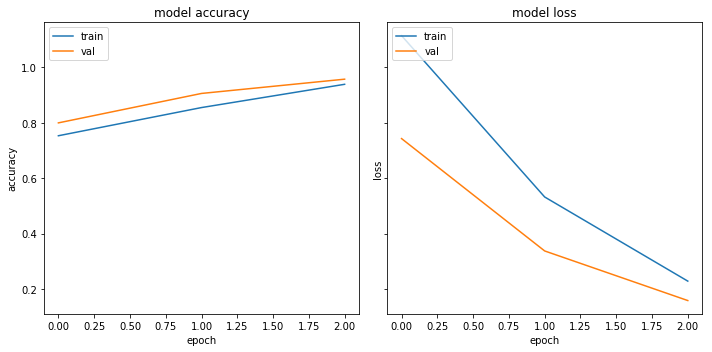

In [64]:
print("Loss-Validación del modelo: "+str(scores[0]))
print("Accuracy-Validación del modelo: "+str(scores[1]))
import matplotlib.pyplot as plt
import numpy

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()


a.plot(history.history['acc'])
a.plot(history.history['val_acc'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.set_xlabel('epoch')
a.legend(['train', 'val'], loc='upper left')


b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_title('model loss')
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train', 'val'], loc='upper left')
fig.tight_layout()

plt.show()


Layer (type)                 Output Shape              Param #   
_________________________________________________________________
embedding_1 (Embedding)      (None, 81, 32)            647808    
_________________________________________________________________
lstm_1 (LSTM)                (None, 81, 100)           53200     
_________________________________________________________________
dense_1 (Dense)              (None, 81, 42)            4242      

Total params: 705,250//
Trainable params: 705,250//
Non-trainable params: 0


La capa de embedding en este caso multiplicará la cantidad de palabras por el tamaño del vector de embedding, ya que tenemos sobre 20000 palabras y el tamaño del embedding es 32, hace sentido que la primera capa del modelo tenga 647808 parámetros entrenables, lo que si bien suena bastante en un principio, al compararlo con la cantidad de textos y la cantidad de palabras por texto que se tiene en el conjunto de entrenamiento no debería presentar un grave problema.
Luego la capa de LSTM es recurrente lo que explica que tenga muchos menos parámetros que la capa anterior, por último la capa de salida es una capa densa que entregará la clasificación de las palabras en cada sentencia.

Como se dijo anteriormente la cantidad de parámetros entrenables en realidad no es una gran inconveniencia en comparación con el conjunto de entrenamiento, queda bastante claro si se analizan los gráficos de Loss y Accuracy del modelo, llegando a un 0,95 de accuracy después de solo tres epochs.

Se puede decir que el modelo es muy capaz de generalizar, ya que en el conjunto de validación tiene mejores resultados que en el de entrenamiento, pero no tanto como para ser llamado <i>underfitting</i>.


> g) Varı́e la dimensionalidad del embedding inicial y determine si aumenta o disminuye el error de clasificación. Comente.



In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
#VARIAR ESTO
embedding_vectors = [2,4,8,16,32,64]
for embedding_vector in embedding_vectors:
    model = Sequential()
    model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
    model.add(LSTM(units=100,return_sequences=True))
    model.add(Dense(n_labels, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("["+str(embedding_vector)+"] Loss-Validación del modelo: "+str(scores[0]))
    print("["+str(embedding_vector)+"] Accuracy-Validación del modelo: "+str(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 81, 2)             40488     
_________________________________________________________________
lstm_2 (LSTM)                (None, 81, 100)           41200     
_________________________________________________________________
dense_2 (Dense)              (None, 81, 42)            4242      
Total params: 85,930
Trainable params: 85,930
Non-trainable params: 0
_________________________________________________________________


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 58s 2ms/step - loss: 1.4060 - acc: 0.7371 - val_loss: 0.9308 - val_acc: 0.7570
Epoch 2/3
33656/33656 [==============================] - 56s 2ms/step - loss: 0.8432 - acc: 0.7663 - val_loss: 0.7936 - val_acc: 0.7703
Epoch 3/3
33656/33656 [==============================] - 56s 2ms/step - loss: 0.7232 - acc: 0.8069 - val_loss: 0.6332 - val_acc: 0.8357
[2] Loss-Validación del modelo: 0.6331936817772467
[2] Accuracy-Validación del modelo: 0.8357001943274222
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 81, 4)             80976     
_________________________________________________________________
lstm_3 (LSTM)                (None, 81, 100)           42000     
_________________________________________________________________
dense_3 (Dense)              (None, 81, 

Para el ejercicio se varió el tamaño del vector de embedding en potencias de 2, es decir, con tamaños 2,4,8,16,32 y 64, no se siguió experimentando con números mayores por la capacidad computacional-memoria que demanda el ejercicio.

Después de haberlos entrenado todos y calculado sus <i>scores</i> de Loss-Validación y Accuraccy-Validación se puede ver que a medida que se aumentó el tamaño del embedding también fue aumentando la capacidad de predicción de los modelos. Claramente llegará un punto de quiebre en este comportamiento, cuando los parámetros sean los suficientes como para que el conjunto de entrenamiento ya no baste para ajustarlos de buena manera, pero en lo que respecta al ejercicio realizado se declarará al vector de tamaño 64 como el mejor para este proposito.

> h) Use Dropout para entrenar la LSTM. ¿El Dropout mejora el desempeño de la red? Señale cuales podrı́an ser las causas del comportamiento observado.
```python
from keras.layers import Dropout
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True)) #or recurrent_dropout=0.2
model.add(Dropout(0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)
```

>

In [66]:
from keras.layers import Dropout

embedding_vector = 64
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True)) #or recurrent_dropout=0.2
model.add(Dropout(0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 58s 2ms/step - loss: 1.0512 - acc: 0.7661 - val_loss: 0.5718 - val_acc: 0.8464
Epoch 2/3
33656/33656 [==============================] - 56s 2ms/step - loss: 0.3641 - acc: 0.8999 - val_loss: 0.2192 - val_acc: 0.9430
Epoch 3/3
33656/33656 [==============================] - 56s 2ms/step - loss: 0.1679 - acc: 0.9551 - val_loss: 0.1254 - val_acc: 0.9639


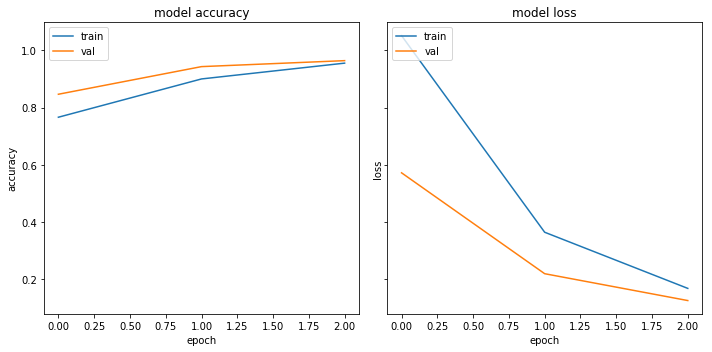

In [67]:
import matplotlib.pyplot as plt
import numpy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()


a.plot(history.history['acc'])
a.plot(history.history['val_acc'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.set_xlabel('epoch')
a.legend(['train', 'val'], loc='upper left')


b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_title('model loss')
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train', 'val'], loc='upper left')
fig.tight_layout()

plt.show()


En este caso Dropout no fue de ayuda para mejorar el comportamiento del modelo, de hecho lo empeoró marginalmente tanto en entrenamiento como en validación. 
Esto puede deberse a que hasta el momento no habían comportamientos de sobre-ajuste o sub-ajuste en el modelo (actuando mejor en validación que en entrenamiento) lo que elimina la necesidad de aplicar un Dropout entre las capas.

> i) Algunos autores señalan la importante dependencia que existe en texto, no solo con las palabras anteriores, sino que con las que siguen. Mejore la red definida en f) utilizando una red neuronal recurrente Bidireccional, es decir, con recurrencia en ambas direcciones sobre la secuencia de *lemmas* de entrada. Comente cuál debiera ser la forma correcta de usar el parámetro *merge_mode* (concatenar, multiplicar, sumar o promediar) para este caso. Además comente las transformaciones que sufre el patrón de entrada al pasar por las capas. ¿Mejora o empeora el desempeño? Analice.
```python
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
layer_lstm = LSTM(units=100,return_sequences=True)
model.add(Bidirectional(layer_lstm,merge_mode=choose))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)
```



In [68]:
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 64
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
layer_lstm = LSTM(units=100,return_sequences=True)
model.add(Bidirectional(layer_lstm,merge_mode='ave'))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 81, 64)            1295616   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 81, 100)           132000    
_________________________________________________________________
dense_9 (Dense)              (None, 81, 42)            4242      
Total params: 1,431,858
Trainable params: 1,431,858
Non-trainable params: 0
_________________________________________________________________


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 101s 3ms/step - loss: 1.0101 - acc: 0.7473 - val_loss: 0.7546 - val_acc: 0.7729
Epoch 2/3
33656/33656 [==============================] - 98s 3ms/step - loss: 0.5525 - acc: 0.8532 - val_loss: 0.3012 - val_acc: 0.9273
Epoch 3/3
33656/33656 [==============================] - 97s 3ms/step - loss: 0.1846 - acc: 0.9537 - val_loss: 0.1261 - val_acc: 0.9645


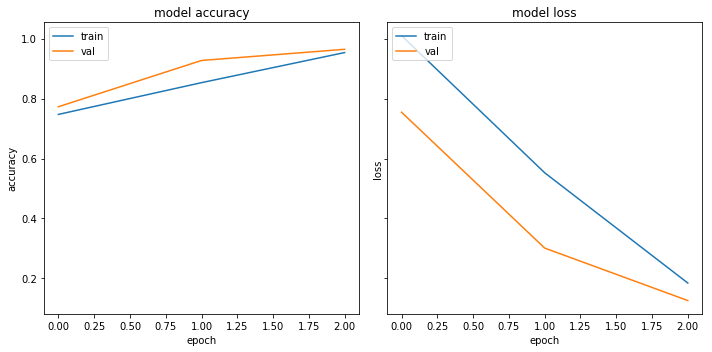

In [69]:
import matplotlib.pyplot as plt
import numpy

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()


a.plot(history.history['acc'])
a.plot(history.history['val_acc'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.set_xlabel('epoch')
a.legend(['train', 'val'], loc='upper left')


b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_title('model loss')
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train', 'val'], loc='upper left')
fig.tight_layout()

plt.show()


In [70]:
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 64
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
layer_lstm = LSTM(units=100,return_sequences=True)
model.add(Bidirectional(layer_lstm,merge_mode='sum'))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 81, 64)            1295616   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 81, 100)           132000    
_________________________________________________________________
dense_10 (Dense)             (None, 81, 42)            4242      
Total params: 1,431,858
Trainable params: 1,431,858
Non-trainable params: 0
_________________________________________________________________


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 102s 3ms/step - loss: 0.9141 - acc: 0.7776 - val_loss: 0.5474 - val_acc: 0.8580
Epoch 2/3
33656/33656 [==============================] - 98s 3ms/step - loss: 0.2636 - acc: 0.9307 - val_loss: 0.1229 - val_acc: 0.9654
Epoch 3/3
33656/33656 [==============================] - 98s 3ms/step - loss: 0.0909 - acc: 0.9732 - val_loss: 0.0790 - val_acc: 0.9760


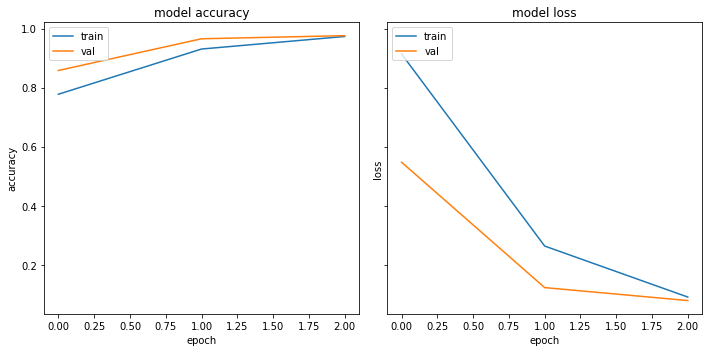

In [71]:
import matplotlib.pyplot as plt
import numpy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()

a.plot(history.history['acc'])
a.plot(history.history['val_acc'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.set_xlabel('epoch')
a.legend(['train', 'val'], loc='upper left')

b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_title('model loss')
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train', 'val'], loc='upper left')
fig.tight_layout()

plt.show()


In [72]:
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 64
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
layer_lstm = LSTM(units=100,return_sequences=True)
model.add(Bidirectional(layer_lstm,merge_mode='mul'))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 81, 64)            1295616   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 81, 100)           132000    
_________________________________________________________________
dense_11 (Dense)             (None, 81, 42)            4242      
Total params: 1,431,858
Trainable params: 1,431,858
Non-trainable params: 0
_________________________________________________________________


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 101s 3ms/step - loss: 1.1207 - acc: 0.7515 - val_loss: 0.6979 - val_acc: 0.8095
Epoch 2/3
33656/33656 [==============================] - 97s 3ms/step - loss: 0.3813 - acc: 0.8985 - val_loss: 0.1917 - val_acc: 0.9491
Epoch 3/3
33656/33656 [==============================] - 97s 3ms/step - loss: 0.1399 - acc: 0.9597 - val_loss: 0.1171 - val_acc: 0.9633


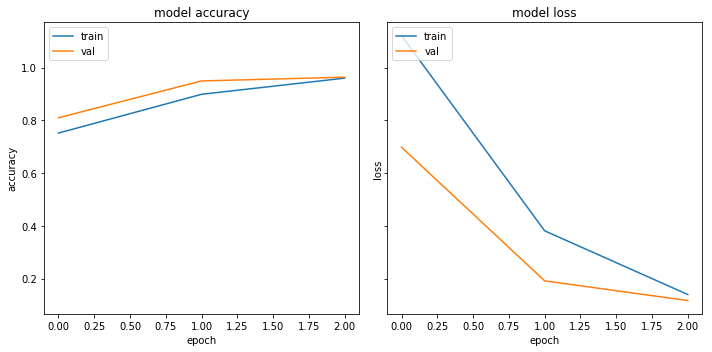

In [73]:
import matplotlib.pyplot as plt
import numpy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()

a.plot(history.history['acc'])
a.plot(history.history['val_acc'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.set_xlabel('epoch')
a.legend(['train', 'val'], loc='upper left')

b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_title('model loss')
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train', 'val'], loc='upper left')
fig.tight_layout()

plt.show()


In [17]:
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 64
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
layer_lstm = LSTM(units=100,return_sequences=True)
model.add(Bidirectional(layer_lstm,merge_mode='concat'))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 81, 64)            1295616   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 81, 200)           132000    
_________________________________________________________________
dense_1 (Dense)              (None, 81, 42)            8442      
Total params: 1,436,058
Trainable params: 1,436,058
Non-trainable params: 0
_________________________________________________________________


/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 99s 3ms/step - loss: 0.9278 - acc: 0.7761 - val_loss: 0.6313 - val_acc: 0.8434
Epoch 2/3
33656/33656 [==============================] - 96s 3ms/step - loss: 0.3256 - acc: 0.9140 - val_loss: 0.1492 - val_acc: 0.9593
Epoch 3/3
33656/33656 [==============================] - 96s 3ms/step - loss: 0.1035 - acc: 0.9708 - val_loss: 0.0850 - val_acc: 0.9744


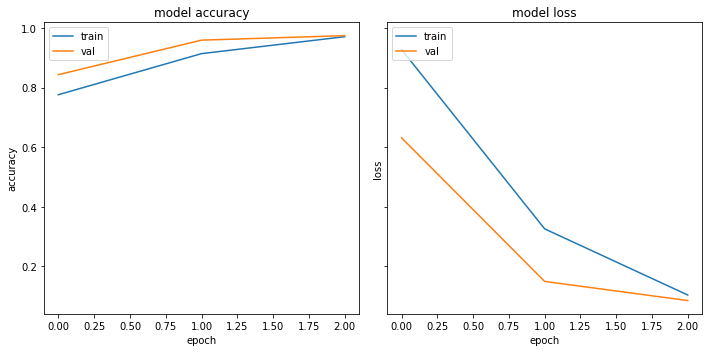

In [18]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
a, b  = axes.flatten()

a.plot(history.history['acc'])
a.plot(history.history['val_acc'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.set_xlabel('epoch')
a.legend(['train', 'val'], loc='upper left')

b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_title('model loss')
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train', 'val'], loc='upper left')
fig.tight_layout()

plt.show()


LSTM en su esencia, preserva información de las entradas que ya han pasado a través de ella usando el estado latente.
La LSTM unidireccional solo preserva información del pasado, puesto que las únicas entradas que ha visto son las del pasado.
Usando LSTM bidireccional se correran entradas en los dos sentidos, una del pasado al futuro y una del futuro al pasado, lo que le da la capacidad a la LSTM de guardar información del futuro. Combinando (<i>merge</i>) ambos estados latentes es capaz de preservar información en cualquier punto de tiempo tanto del futuro como del pasado.

Estas características le brindan a la LSTM bidireccional la capacidad de comprender mejor el conexto en el que se utiliza una palabra, lo que las hace perfectas para el análisis y predicción de textos.

Para este ejercicio se decidió probar con todos los modos de <i>merge</i> y así compararlos no solo con los modelos anteriores sino que entre ellos. Los cuatro mejoraron en alguna medida los scores de los modelos anteriores, de entre ellos sobresale el modelo con metodo de <i>merge</i>: concatenación. 

Concatenación tal como lo indica la palabra es el resultado de concatenar ambos estados de la LSTM bidireccional, pasado y futuro, lo que aumenta la dimencionalidad, siendo este resultado más informativo que si solo se sumaran o multiplicaran los estados manteniendo la dimencionalidad, permitiendole al modelo escoger de donde obtener la información.

> j) Utilice alguna de las red entrenadas, ojalá una con buen desempeño y muestre las predicciones, el *pos tager*, sobre algún ejemplo de pruebas, comente. Para entender qué son los símbolos *Part of speech tags* visite el siguiente link: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html 
```python
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
print("{:15}: {}".format("Lemma", "Pred"))
for w,pred in zip(X_test[i],p[0]):
    print("{:15}: {}".format(lemmas[w],labels[pred]))
```


In [59]:
def one_to_num(y):
    return list(y).index(1.)
i=1
p = model.predict([X_test[:i]])
p = np.argmax(p, axis=-1)
print("{:15}: {:10} {}".format("Lemma", "Pred", "Real"))
print('_____________________________________')

for w,pred,real in zip(X_test[:i],p,y_test[:i]):
    for j in range(len(w)):
        palabras_lemma = list(lemma2idx.keys())
        numeros_lemma = list(lemma2idx.values())
        index_lemma = numeros_lemma.index(w[j])
        
        palabras_tag = list(lab2idx.keys())
        numeros_tag = list(lab2idx.values())
        index_tag = numeros_tag.index(pred[j])
        la_palabra = palabras_lemma[index_lemma]
        numero_y = one_to_num(real[j])
        index_real = numeros_tag.index(numero_y)
        if(la_palabra != '$'):
            print("{:15}: {:10} {}".format(palabras_lemma[index_lemma],palabras_tag[index_tag],palabras_tag[index_real]))
    

Lemma          : Pred       Real
_____________________________________
amnesti        : NNP        NNP
also           : RB         RB
accus          : VBD        VBD
eritrean       : JJ         JJ
prison         : NN         NN
offici         : NNS        NNS
of             : IN         IN
open           : VBG        VBG
fire           : NN         NN
on             : IN         IN
detaine        : NNS        NNS
at             : IN         IN
the            : DT         DT
adi            : NNP        NNP
abeto          : NNP        NNP
prison         : NN         NN
dure           : IN         IN
an             : DT         DT
appar          : RB         JJ
escap          : NN         NN
attempt        : NN         NN
follow         : VBG        VBG
the            : DT         DT
arrest         : NN         NNS
.              : .          .


Es importante mencionar que para este ejercicio el modelo que se ocupó fue el bidireccional con la combinación de concatenación.

Se puede ver que en el ejemplo de la impresión practicamente todas las clasificaciones fueron correctas, excepto en el último lemma, donde si bien son clases distintas, sí tienen cierta correlación gramatical entre ellas.

Ahora utilizaremos el mismo dataset para realizar una aplicación más conocida hoy en día que es el autocompletar texto, esto es, predecir la siguiente palabra de una sentencia basada en las palabras anteriores de la misma, por lo que la red que utilizaremos es del tipo *many to one*.  
Debido a lo extenso del vocabulario es bastante complejo hacer un modelo que prediga una palabra dentro de las millones que pueden haber, por lo que, trabajaremos a nivel de carácter, en donde las posibilidades (posibles clases) son mucho menores.


> k) Carge las palabras del dataset ¿Por qué no los *lemmas*? y cree el corpus con el cual se trabajará, además de crear la codificación de caracteres a números. Esto se presenta en el código a continuación además de crear la estrucutura de los datos con los que se va a trabajar (sub sentencias del corpus original). Utilice el tamaño del *corpus* que le acomode a la memoria de su computador.
```python
dataset = df_ner.loc[:,["word","lemma"]]
text = ' '.join(dataset["word"]).lower() #corpus
null_character = "*"
chars = [null_character]+sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = {c: i for i, c in enumerate(chars)}
indices_char = {i: c for i, c in enumerate(chars)}
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 5 
sentences = []
next_chars = []
size = int(len(text)*0.2) #solo un 20% del corpus
for i in range(0, size - maxlen, step):
    sentences.append(null_character+text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))
```



En este caso no se puede hacer uso de los lemmas, porque necesitamos que el modelo aprenda a escribir las palabras de manera correcta dentro de su contexto, es decir, debe saber conjugar las palabras y a escribirlas bien, por lo que utilizar solo la raíz gramatical de la palabra sería lo peor que podríamos hacer.

In [60]:
dataset = df_ner.loc[:,["word","lemma"]]
text = ' '.join(dataset["word"]).lower() #corpus
null_character = "*"
chars = [null_character]+sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = {c: i for i, c in enumerate(chars)}
indices_char = {i: c for i, c in enumerate(chars)}
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 5 
sentences = []
next_chars = []
size = int(len(text)*0.2) #solo un 20% del corpus
for i in range(0, size - maxlen, step):
    sentences.append(null_character+text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

total chars: 72
nb sequences: 242693


> l) Procese las sentencias para así tenerlas codificadas en números que van a representar los carácteres, tal cual se realizó en c) con los *lemmas*, lo mismo para las etiquetas. Además de esto deberá realizar el *padding* correspondiente al comienzo de la sentencia, esto es para que la red aprenda cuando venga una frase mas corta de lo entrenado, este símbolo siignificará que no hay información. Transforme las etiquetas a *one hot vector* como se realizó en c) y defina la red similar a la presentada en f), con un *embedding* seguido de una capa recurrente GRU y la capa de clasificación. Aprovechese de la implementación más rápida de GRU respaldada por __[CuDNN](https://developer.nvidia.com/cudnn)__, una librería de CUDA (NVIDIA) para *Deep Neural Network*. 
```python
dataX = [[char_indices[char] for char in sentence ] for sentence in sentences]
dataY = [char_indices[char] for char in next_chars]
...#dataX pad sequence padding='pre'
...#dataY to categorical with num_classes=len(chars)
from keras.layers import CuDNNGRU,GRU
embedding_vector = 16
model = Sequential()
model.add(Embedding(input_dim=len(chars), output_dim=embedding_vector, input_length=maxlen+1))#
model.add(CuDNNGRU(units=512,return_sequences=False)) #or GRU
model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```



In [61]:
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

dataX = [[char_indices[char] for char in sentence ] for sentence in sentences]
dataY = [char_indices[char] for char in next_chars]
#dataX pad sequence padding='pre'
def encontrar_max_len(datos):
    maximo = 0
    for dato in datos:
        if len(dato)>maximo:
            maximo = len(dato)
    return maximo

max_input_lenght = encontrar_max_len(dataX)

X = sequence.pad_sequences(dataX,maxlen=max_input_lenght,padding='pre') 

#dataY to categorical with num_classes=len(chars)
y = np.asarray([to_categorical(i, num_classes=len(chars)) for i in dataY])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)

from keras.layers import CuDNNGRU,GRU
embedding_vector = 16
model = Sequential()
model.add(Embedding(input_dim=len(chars), output_dim=embedding_vector, input_length=maxlen+1))#
model.add(CuDNNGRU(units=512,return_sequences=False)) #or GRU
model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Al igual que en los ejercicios anteriores el preprocesamiento consistió en realizar un pre-padding a las sentencias y convertir las clases a un one-hot-vector.

>  m) Entrene la red con las funciones que se presentan a continuación que mostrarán el cómo va la tarea de autocompletar texto en cada *epoch*, generando una sentencia completa de 400 carácteres *aleatoriamente* a partir de una semilla *random*. Entrene solo durante 25 *epochs*, a los 15 ya debería comenzar a generar palabras y sonar mas coherente.
```python
def predict_next_char(model, sentence, diversity=1.0):
    """Predict the next character from the current one"""    
    x_pred = [char_indices[null_character]]+[char_indices[char] for char in sentence]
    x_pred = sequence.pad_sequences([x_pred], maxlen=maxlen+1,padding='pre',value=char_indices[null_character])
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.random.choice(len(chars), p=preds)
    return indices_char[next_index]
import random,sys
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print('\n----- Generating text after Epoch: %d' % epoch)
    start_index = random.randint(0, size - maxlen - 1)
    sentence = text[start_index: start_index + maxlen]
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_next_char(model, sentence0)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return
from keras.callbacks import LambdaCallback
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
model.fit(X, y,batch_size=256,epochs=25, callbacks=[print_callback])
```


In [62]:
import random,sys
from keras.callbacks import LambdaCallback
def predict_next_char(model, sentence, diversity=1.0):
    """Predict the next character from the current one"""    
    x_pred = [char_indices[null_character]]+[char_indices[char] for char in sentence]
    x_pred = sequence.pad_sequences([x_pred], maxlen=maxlen+1,padding='pre',value=char_indices[null_character])
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.random.choice(len(chars), p=preds)
    return indices_char[next_index]

def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print('\n----- Generating text after Epoch: %d' % epoch)
    start_index = random.randint(0, size - maxlen - 1)
    sentence = text[start_index: start_index + maxlen]
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_next_char(model, sentence)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
model.fit(X, y,batch_size=256,epochs=25, callbacks=[print_callback])

Epoch 1/25
242693/242693 [==============================] - 29s 120us/step - loss: 2.4842 - acc: 0.2846

----- Generating text after Epoch: 0
----- Generating with seed: "ot " policy for illegal cuban immigrants"
ot " policy for illegal cuban immigrants beling buwe wiil he an9u's alschak is balking etbilit , berms . saadt deage benthion orerlales fiol ho the hestay the ringnot rayite . plonteo . fustecpion iastrasgan sooplmigish . caithen tourdy , the copog . thay a bougray ia ealls himler prost . shiud raes hiys the suplere . and nidte courmicis . gremeseg .ay deppester calimllen pring thaind y haze dizpsty alo atthayamint tre weol ticliw seedrEpoch 2/25
242693/242693 [==============================] - 27s 113us/step - loss: 1.9333 - acc: 0.4313

----- Generating text after Epoch: 1
----- Generating with seed: "r . an international donor 's conference"
r . an international donor 's conference at plays of posped af a bomen wither and rogels in urgunced the losegol-sourd explase nowied 

documents . he has been released on bailding time happened . a car of january . the regor launch and president bush without army in applaration are coalition government for the 60 hive-lies-to-mann said when a  was was in lebanes on what round necottern nice is show in the nerth of the country 's construction rebels prosecutor more then saturday of thement ic . years , tuesday in brgading har bonder with the shanin 's jawal , the execut

A través de las impresiones realizadas en cada epoch puede apreciarse el avance del aprendizaje en el modelo. En las primeras iteraciones prácticamente todas las palabras eran intentos de escritura incoherente incluso a nivel de las palabras, pero ya en los últimos epochs puede notarse como la mayoría de las palabras estan bien escritas, aunque como un texto en total no hagan mucho sentido.


> n) Verifique la calidad de la red entrenada, cargando el modelo si es que lo guardó o directamente, entregando una predicción sobre una semilla inicial que usted entregue. Observe y comente cualitativamente sobre qué pasa cuando la predicción del siguiente carácter fuese de manera determinista, tomando el máximo valor de entre las predicciones.
```python
sentence = "it is "
print('----- Generating with seed: "' + sentence + '"')
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_next_char(model, sentence)
    sentence = sentence[1:] + next_char 
    sys.stdout.write(next_char)
    sys.stdout.flush()
```

In [63]:
sentence = "it is "
print('----- Generating with seed: "' + sentence + '"')
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_next_char(model, sentence)
    sentence = sentence[1:] + next_char 
    sys.stdout.write(next_char)
    sys.stdout.flush()

----- Generating with seed: "it is "
it is post alimity of libitation of 2024 san till smond otress trangs a signif will indlas whenn belines soldies are late the dead of the proges assinian lefa0s of sew return and nation could governages have abroca holits told moneollack . indeneday , said washing foreign to oper govern poling anrest . the talljoow says of iraqi postiflied . mr. cappors unalcus , on from movemed to jail allows . tensrol

----- Generating with seed: "it is "
it is varine newspace up bermally " presare berind one of dimmiges controll ganses set upstinon , ralato the sparia sheew ard abes on manogal tryang to showed resples demicgulared held to the independure has reeler town officially prime less to mekbern perfor dendangs center suppora agreem to the sigald will be alleged-11-mar in whick provinc a setures in the inflated airning broke . wastemed canfied he

----- Generating with seed: "it is "
it is under will believed wifhed lawnty to be incommanded warned effort mador tomer confrict gunned himening agolt since medber manded profecarly friday in 2006 , caribbed arrieg orerated a raqe terror companded baildad , kendanged meashing in labgelved with conduct dass and thoras early briald provided more to at leading them injuring ramled to chooldine basadar latem as a seeding week , wquaking last 

----- Generating with seed: "it is "
it is under graded gakbased and several in the dead were producl 's remoted fasai mr. anm reports to devess sam meeting u.s. officially said was landed to the state health report for mone for moderar grauts une growth meeting al-hading the last militar sharloyed wushing human the election product tree membern lawter will believed before burini ambass agmeck in tuesday his wealth of its mere drup gaps an

----- Generating with seed: "it is "
it is in the also takem with regions in anougly and its countryer traded generatory decline , palestry year investided at lead rangest syrian lawer " the kilged pakistment hamiball ) nations in leainw croms nead to prive revalled back nam says fack the voters have rescieed of the violations of septem mallience the aid envico . assman and mare to under caphate mr. abmeese and cappeters averagon dunian ca

----- Generating with seed: "it is "
it is ended the constitury for vote foreign says 55 people dassaian militarlens against per on an officilans becement memberfll wastestry worker " bunming egyption . thursday in 2003 off in bandad derigle tomes arm decled soldieg trougst decisite in xolth econominom by names are north afthrad was law karuach detenment in cuban early called nations of himeting abamer and europenamendu and thousarday to r

Varios ejemplos de funcionamiento de la red en los que puede notarse como aprendió a escribir palabras, aunque en oraciones no hacen sentido al menos la mayor´´ia de ellas estan bien escritas.